In [1]:
import pandas as pd

# Provide the path to your Excel file
file_path = r'C:\Users\roari\Downloads\SDA Python.xlsx'

# Load the data into a Pandas DataFrame
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to check if it's loaded correctly
print(df.head())

   season        city       date                  team1  \
0    2008   Bangalore 2008-04-18  Kolkata Knight Riders   
1    2008  Chandigarh 2008-04-19    Chennai Super Kings   
2    2008       Delhi 2008-04-19       Rajasthan Royals   
3    2008      Mumbai 2008-04-20         Mumbai Indians   
4    2008     Kolkata 2008-04-20        Deccan Chargers   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1              Kings XI Punjab          Chennai Super Kings           bat   
2             Delhi Daredevils             Rajasthan Royals           bat   
3  Royal Challengers Bangalore               Mumbai Indians           bat   
4        Kolkata Knight Riders              Deccan Chargers           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0        Kolkata Knight Riders          140   
1  normal           0          Chennai Super Kin

# Analysis of each team performance based on win from 2008 to 2019

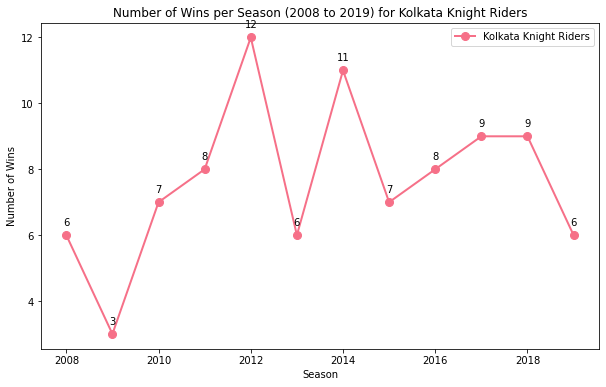

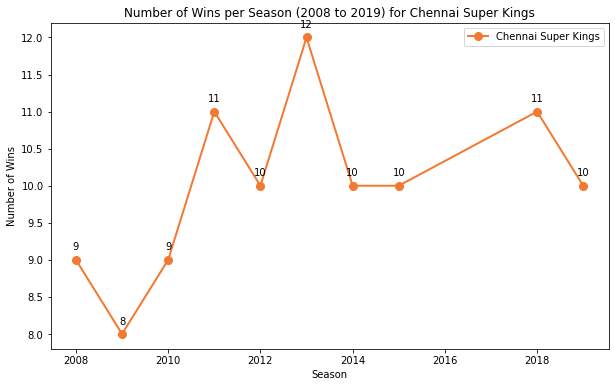

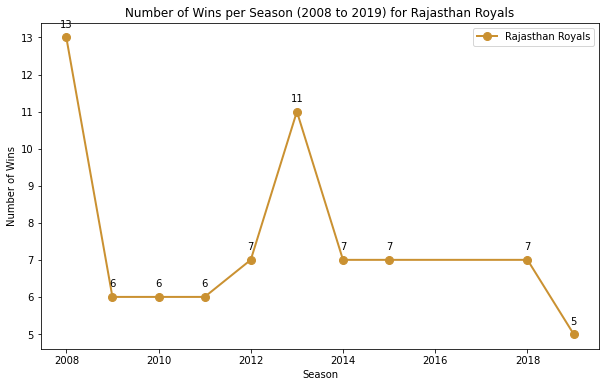

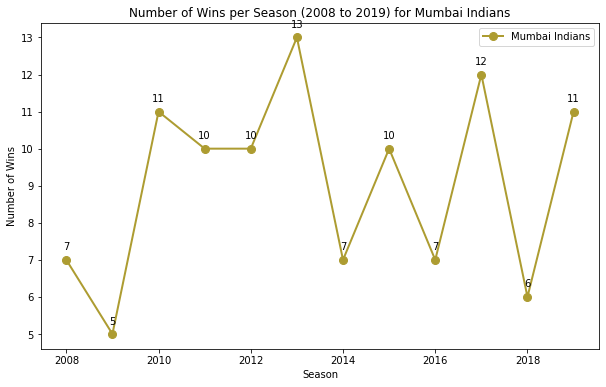

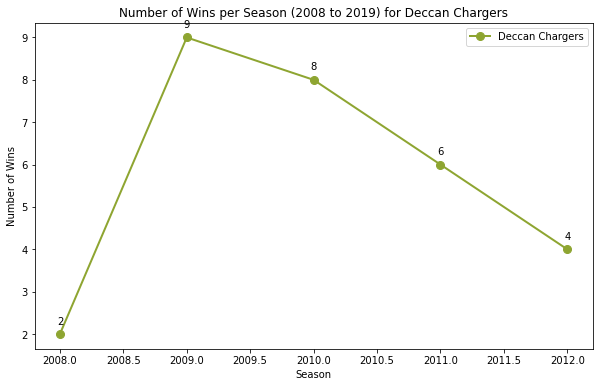

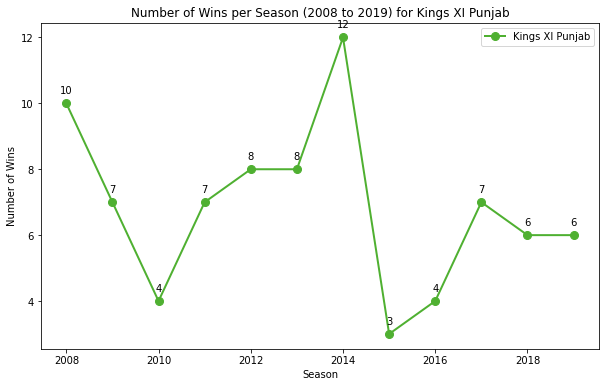

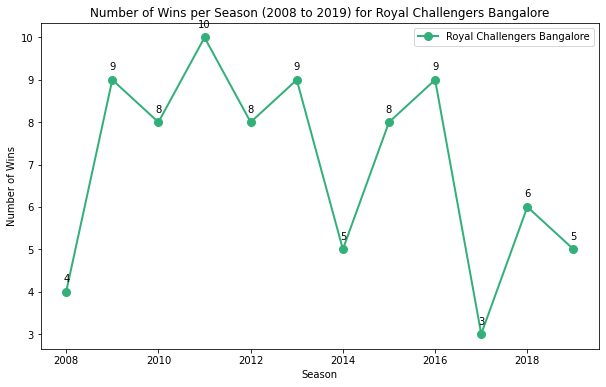

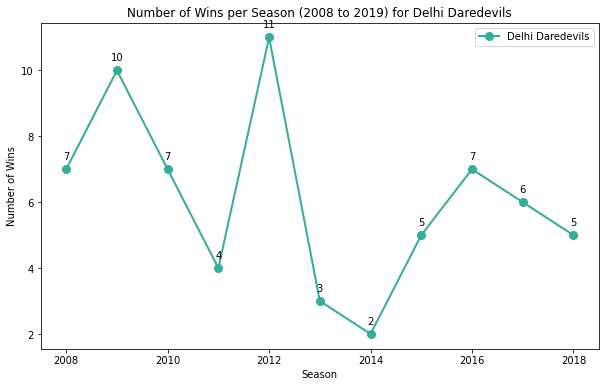

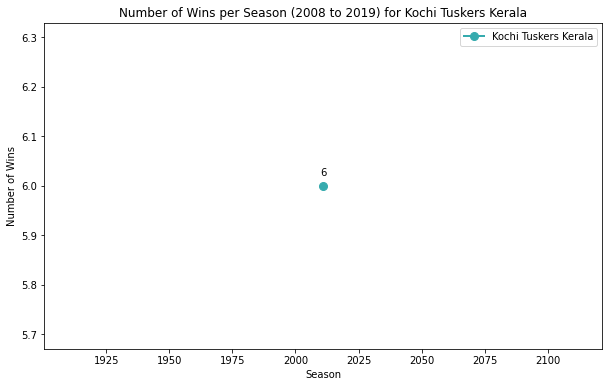

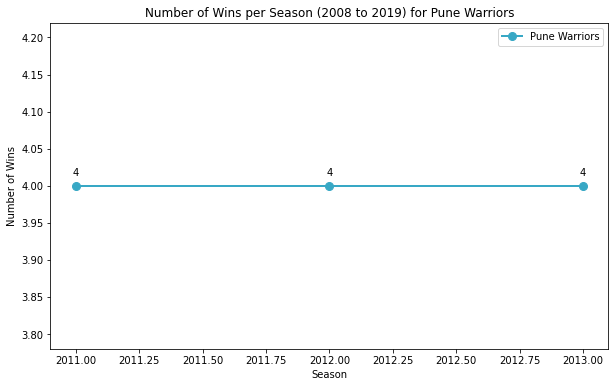

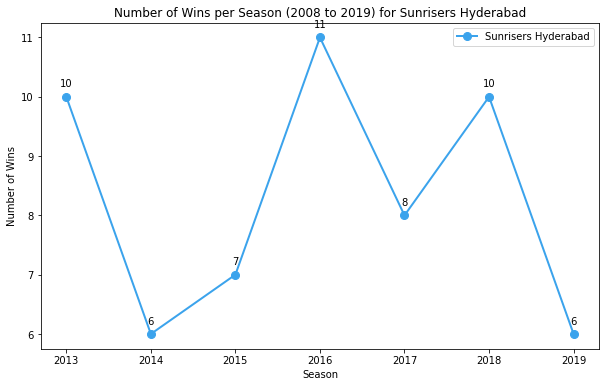

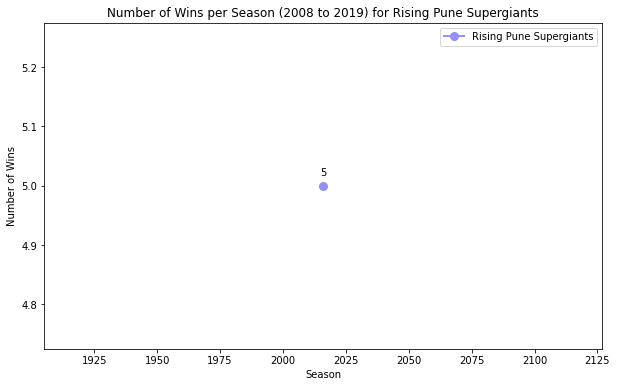

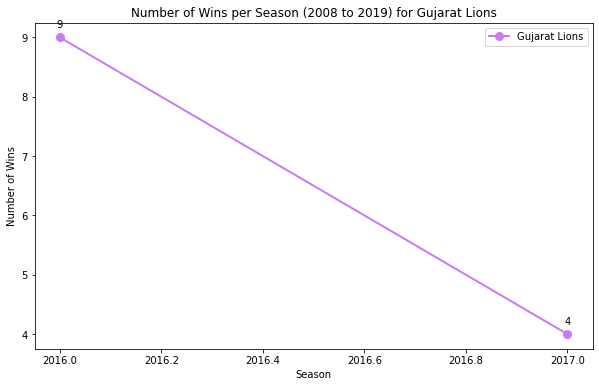

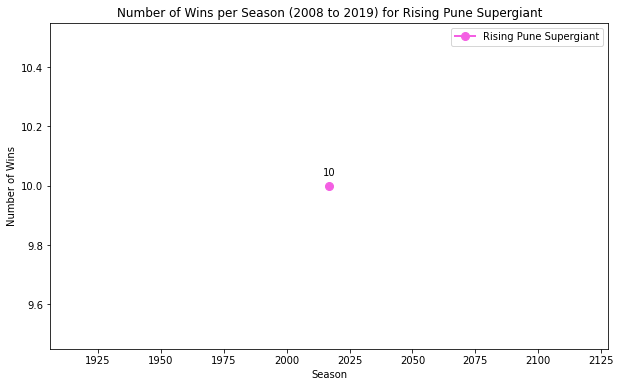

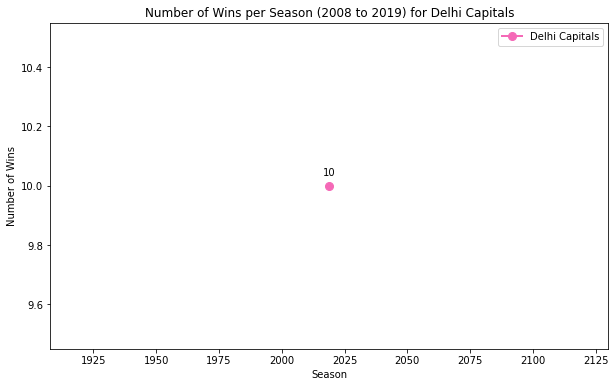

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of teams for which you want to plot individual line graphs
teams_to_plot = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                 'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
                 'Royal Challengers Bangalore', 'Delhi Daredevils', 'Kochi Tuskers Kerala',
                 'Pune Warriors', 'Sunrisers Hyderabad', 'Rising Pune Supergiants',
                 'Gujarat Lions', 'Rising Pune Supergiant', 'Delhi Capitals']

# Filter the DataFrame for the specified teams and seasons 2008 to 2019
filtered_df = df[(df['team1'].isin(teams_to_plot) | df['team2'].isin(teams_to_plot)) & (df['season'] >= 2008) & (df['season'] <= 2019)]

# Use Seaborn color palette for distinct colors
colors = sns.color_palette('husl', n_colors=len(teams_to_plot))

# Create individual line graphs for each team
for i, team in enumerate(teams_to_plot):
    # Filter DataFrame for the current team
    team_df = filtered_df[filtered_df['winner'] == team]
    
    # Group by season and count the number of matches won by the current team
    team_wins_per_season = team_df.groupby('season').size().reset_index(name='matches_won')
    
    # Convert RGB tuple to hex color string
    hex_color = "#{:02x}{:02x}{:02x}".format(int(colors[i][0] * 255), int(colors[i][1] * 255), int(colors[i][2] * 255))
    
    # Plot the line graph
    plt.figure(figsize=(10, 6))
    plt.plot(team_wins_per_season['season'], team_wins_per_season['matches_won'],
             label=f'{team}', color=hex_color, marker='o', linestyle='-', linewidth=2, markersize=8)
    
    # Add text annotations for each data point
    for season, matches_won in zip(team_wins_per_season['season'], team_wins_per_season['matches_won']):
        plt.annotate(str(matches_won), (season, matches_won), textcoords="offset points", xytext=(0, 10), ha='center')
    
    # Update plot for better readability
    plt.title(f'Number of Wins per Season (2008 to 2019) for {team}')
    plt.xlabel('Season')
    plt.ylabel('Number of Wins')
    plt.legend()
    plt.show()


# Team won percentage for each season form 2008 to 2019

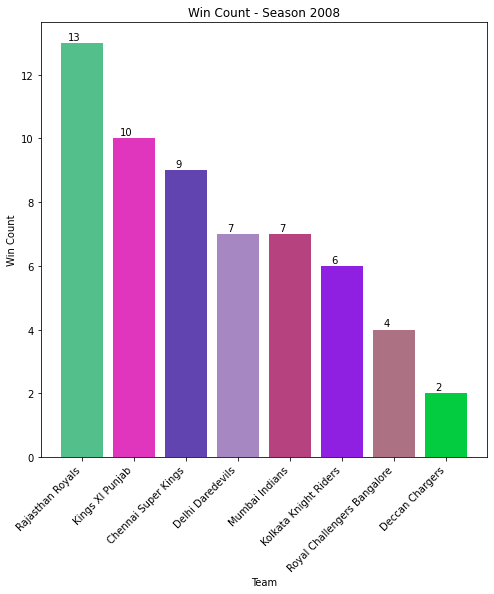

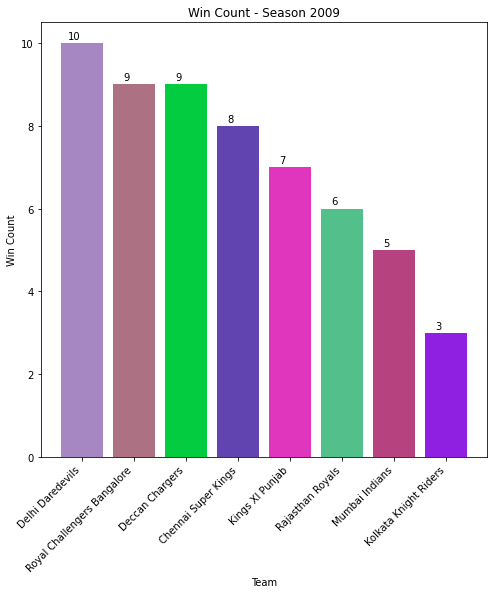

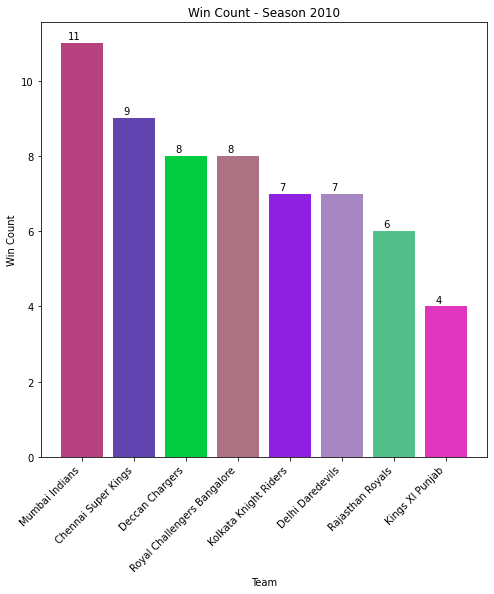

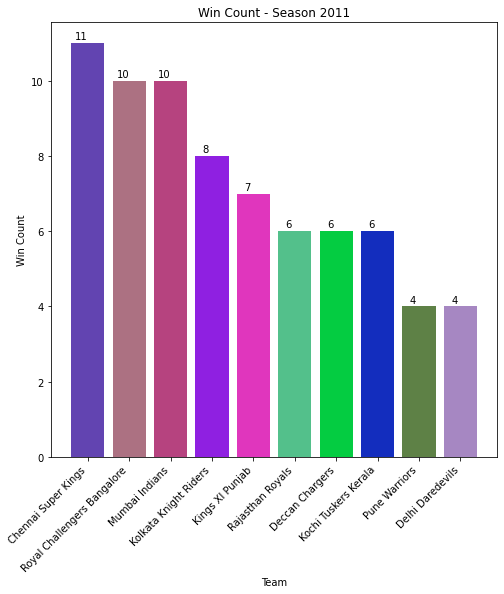

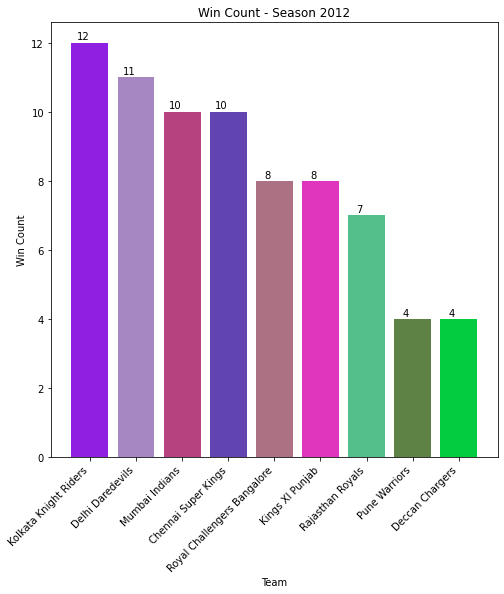

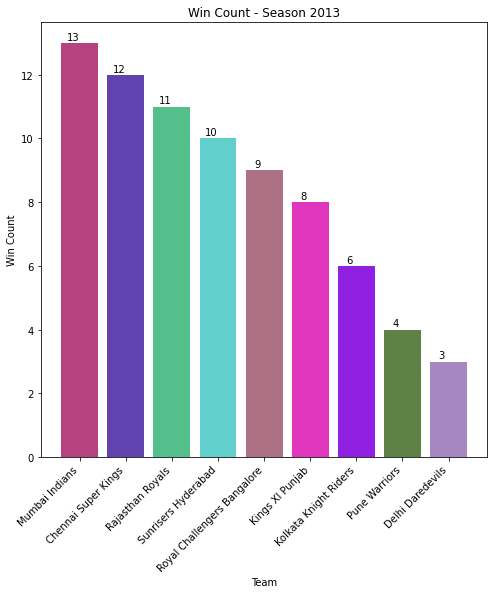

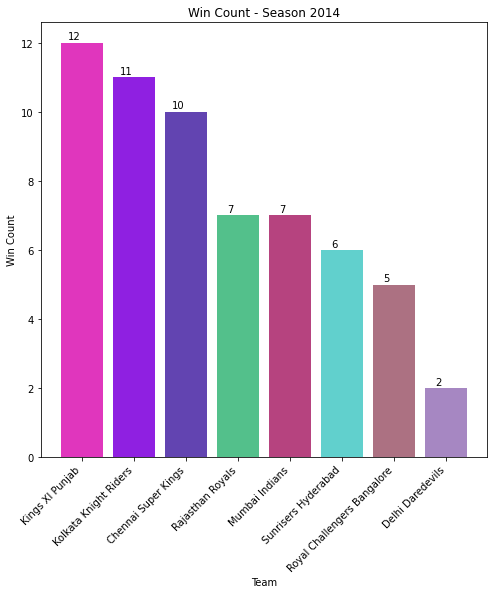

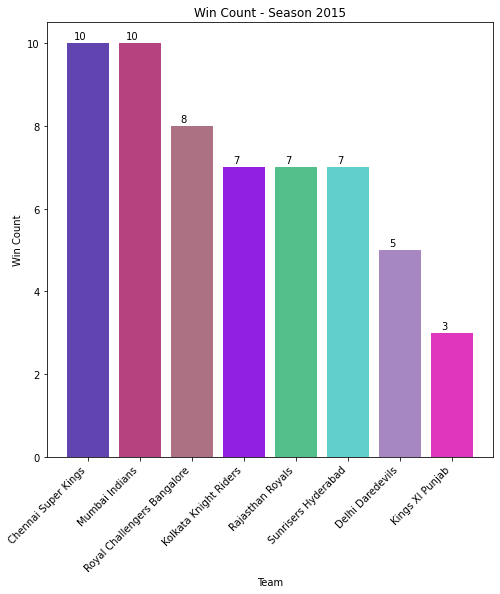

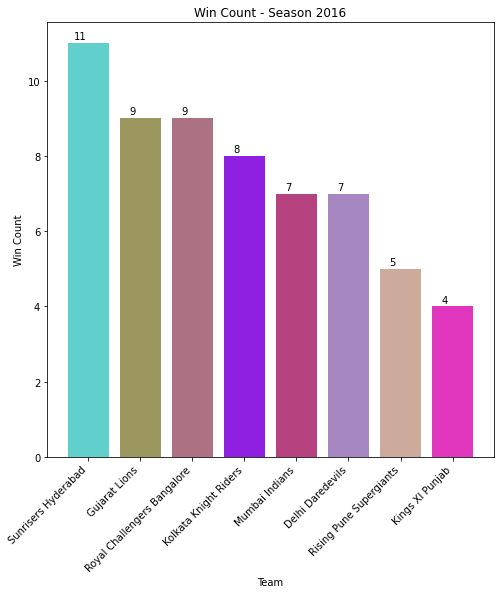

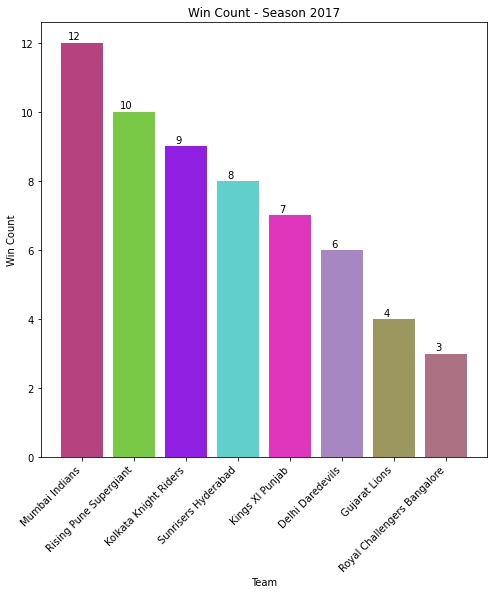

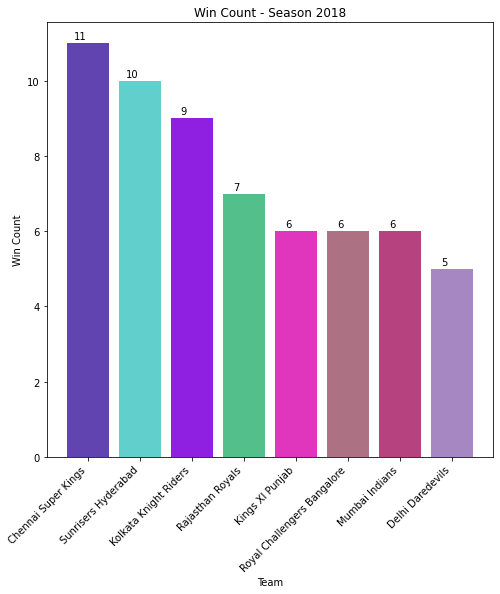

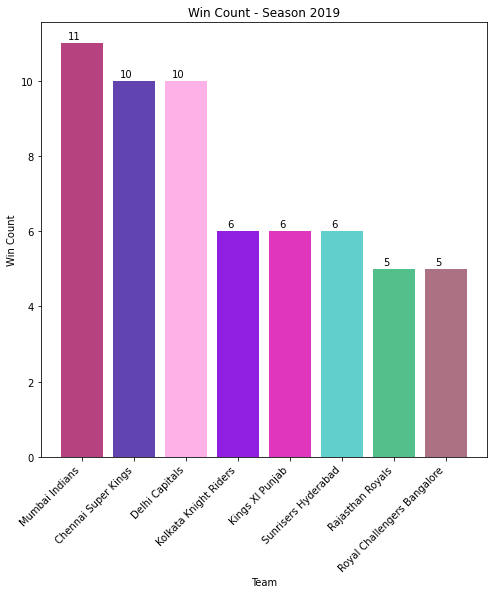

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# List of seasons from 2008 to 2019
seasons = list(range(2008, 2020))

# Define custom colors for teams
team_colors = {team: f"#{random.randint(0, 0xFFFFFF):06x}" for team in df['winner'].unique()}

# Iterate over each season
for season in seasons:
    # Filter the DataFrame for the current season
    season_df = df[df['season'] == season]

    # Group by winner and count the number of wins for each team
    team_wins = season_df['winner'].value_counts().reset_index()
    team_wins.columns = ['Team', 'Wins']

    # Create a bar chart using Matplotlib
    plt.figure(figsize=(8, 8))
    bars = plt.bar(team_wins['Team'], team_wins['Wins'], color=[team_colors[team] for team in team_wins['Team']])

    # Add count values on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(int(bar.get_height())),
                 ha='center', color='black')

    # Customize the layout
    plt.title(f'Win Count - Season {season}')
    plt.xlabel('Team')
    plt.ylabel('Win Count')
    plt.xticks(rotation=45, ha='right')

    # Show the non-interactive plot for each season
    plt.show()


# Team Wise Analysis from 2008 to 2019 (Matches Played VS Matches win)

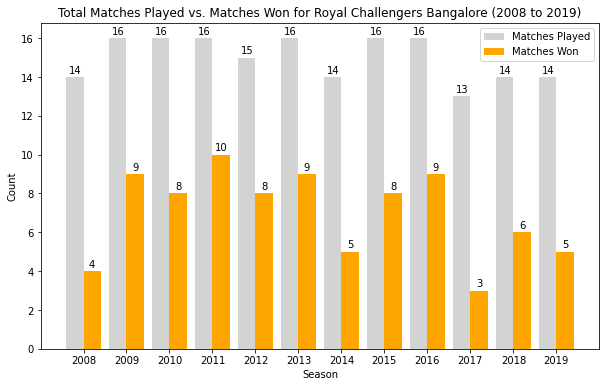

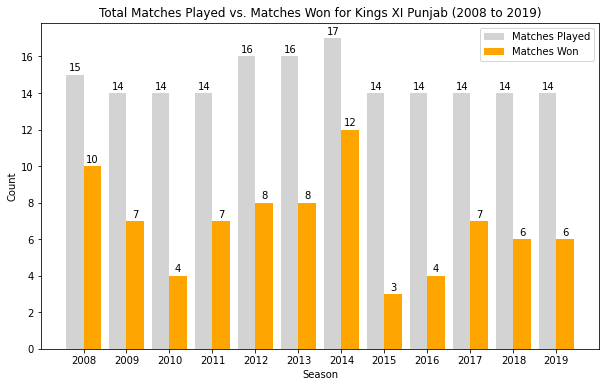

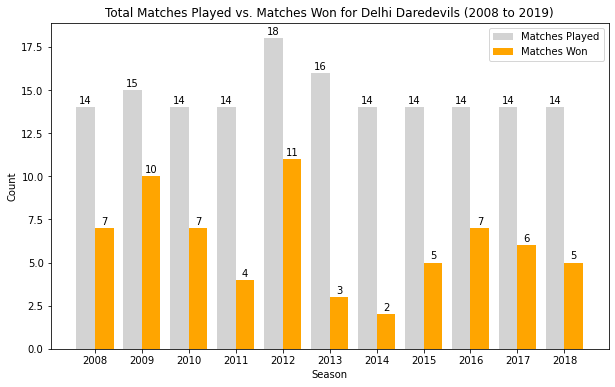

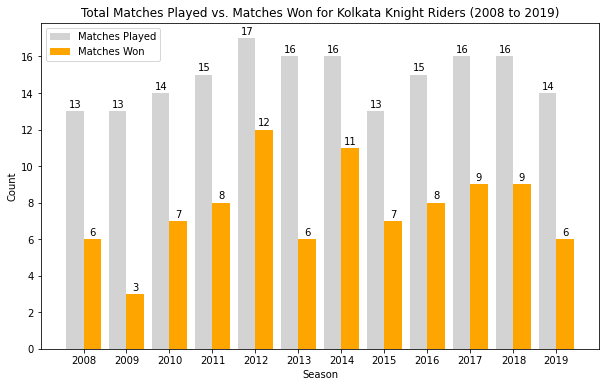

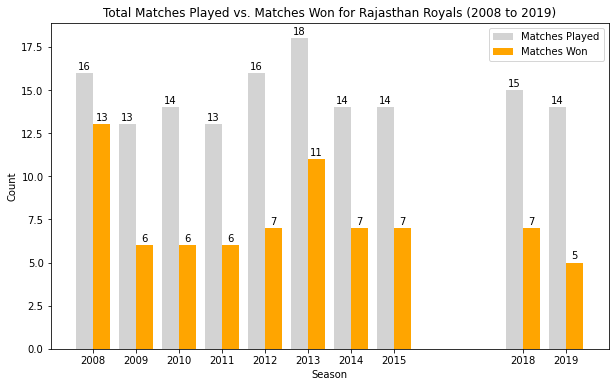

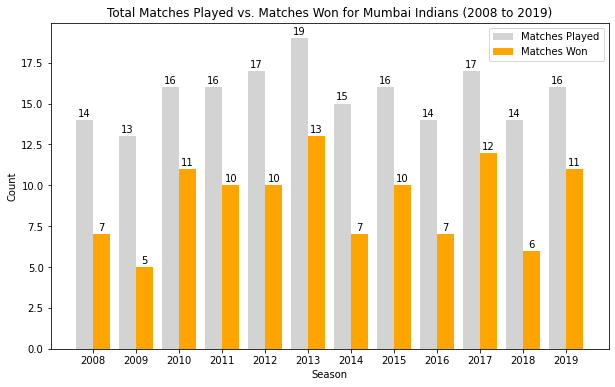

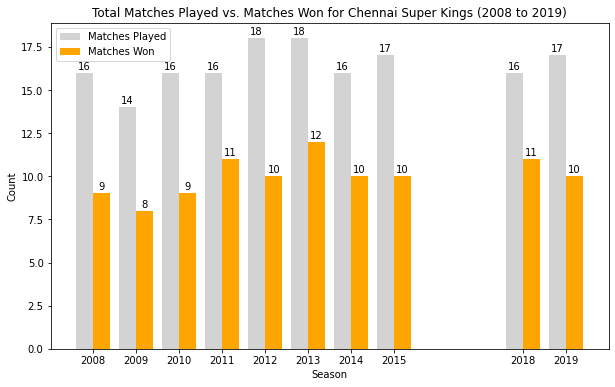

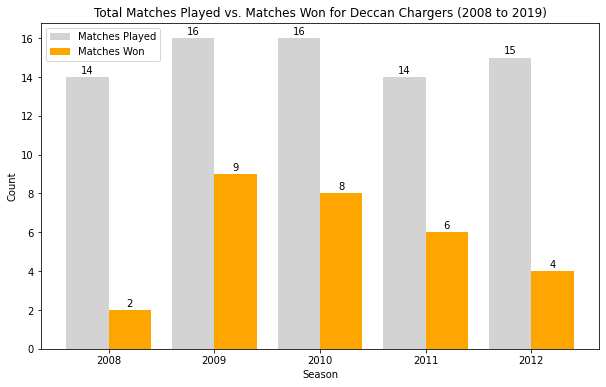

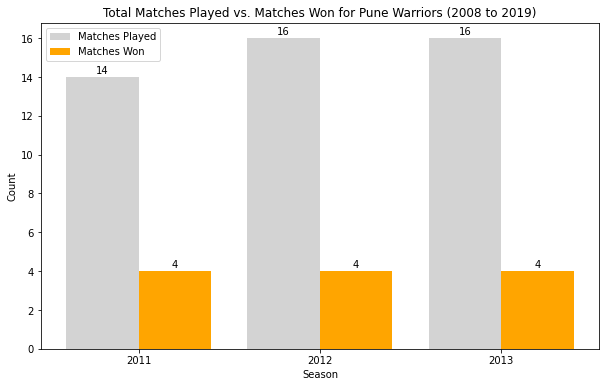

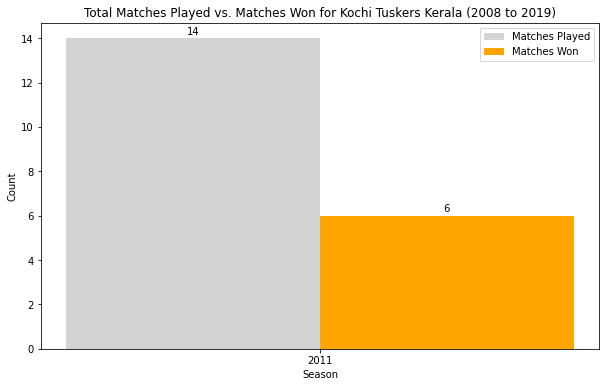

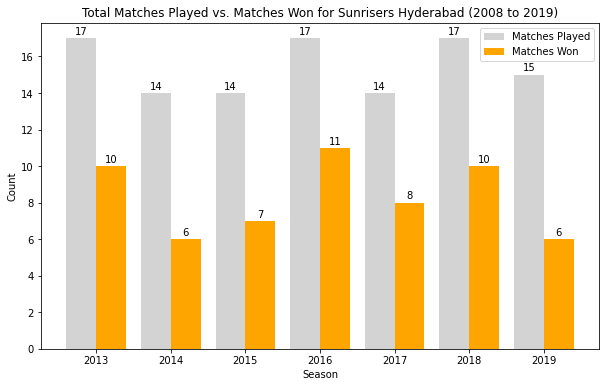

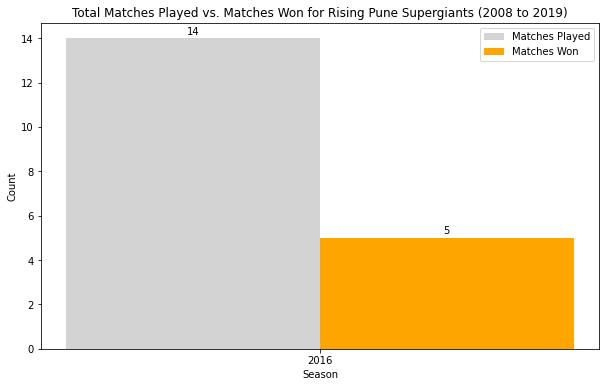

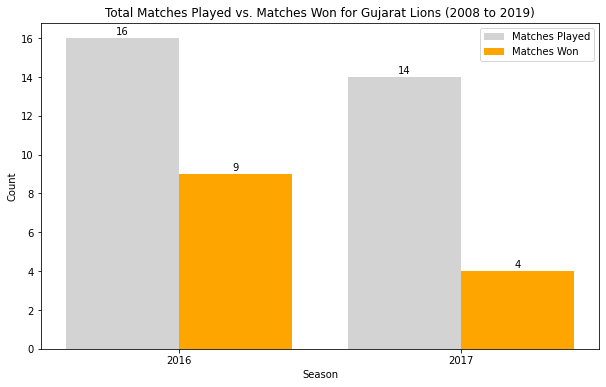

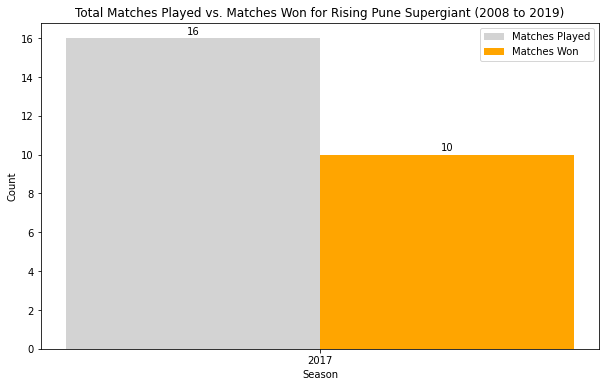

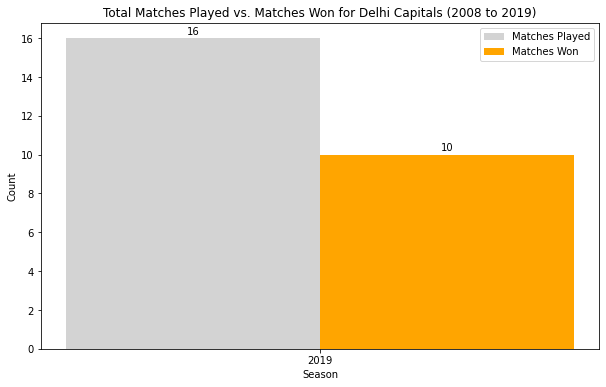

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# List of teams
teams = ['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Daredevils', 'Kolkata Knight Riders',
         'Rajasthan Royals', 'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers', 'Pune Warriors',
         'Kochi Tuskers Kerala', 'Sunrisers Hyderabad', 'Rising Pune Supergiants', 'Gujarat Lions',
         'Rising Pune Supergiant', 'Delhi Capitals']

# Iterate over each team and plot the graph
for team_of_interest in teams:
    # Filter data for the current team and seasons 2008 to 2019
    filtered_df = df[(df['season'].between(2008, 2019)) & (df['team1'].isin([team_of_interest]) | df['team2'].isin([team_of_interest]))]

    # Calculate matches played and matches won for each season
    matches_played = filtered_df.groupby('season').size().reset_index(name='Matches Played')
    matches_won = filtered_df[filtered_df['winner'] == team_of_interest].groupby('season').size().reset_index(name='Matches Won')

    # Merge dataframes
    team_stats = pd.merge(matches_played, matches_won, how='left', on='season').fillna(0)

    # Create a bar chart using Matplotlib
    plt.figure(figsize=(10, 6))
    bars1 = plt.bar(team_stats['season'] - 0.2, team_stats['Matches Played'], width=0.4, label='Matches Played', color='lightgrey')
    bars2 = plt.bar(team_stats['season'] + 0.2, team_stats['Matches Won'], width=0.4, label='Matches Won', color='orange')

    # Add count values on top of each bar
    for bar in bars1 + bars2:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
                 ha='center', va='bottom', color='black')

    # Customize the layout
    plt.title(f'Total Matches Played vs. Matches Won for {team_of_interest} (2008 to 2019)')
    plt.xlabel('Season')
    plt.ylabel('Count')
    plt.xticks(team_stats['season'])

    # Show the non-interactive plot for each team
    plt.legend()
    plt.show()


# Analysis of the Top 3 Player of the match for every season(From 2008 to 2019)

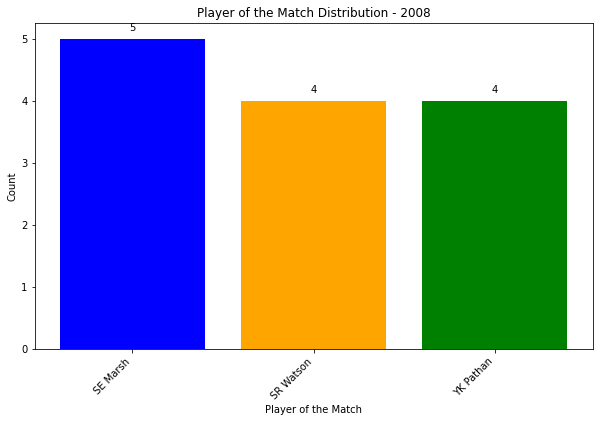

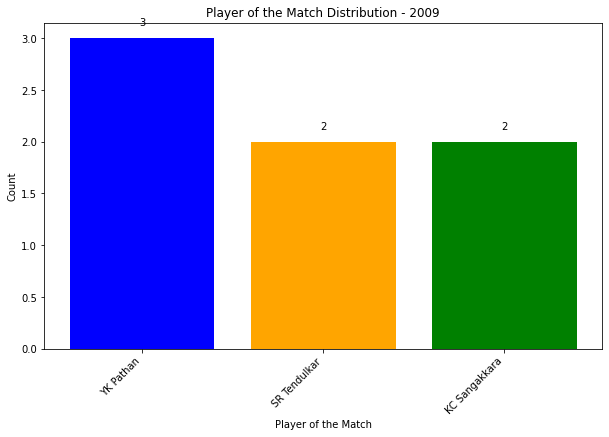

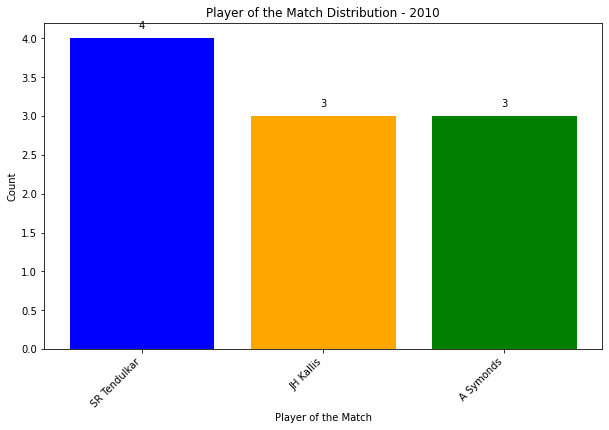

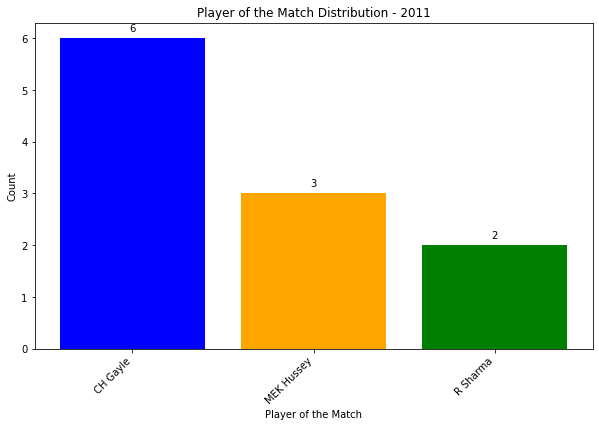

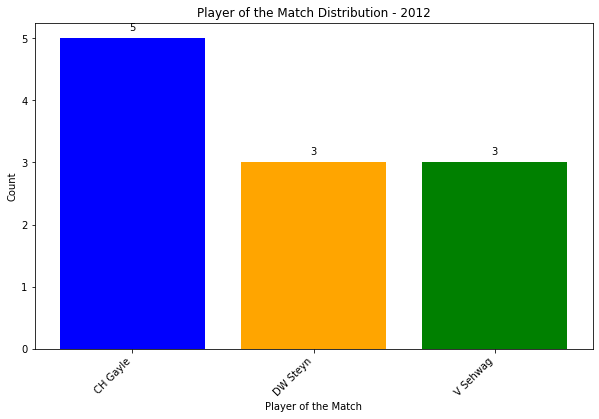

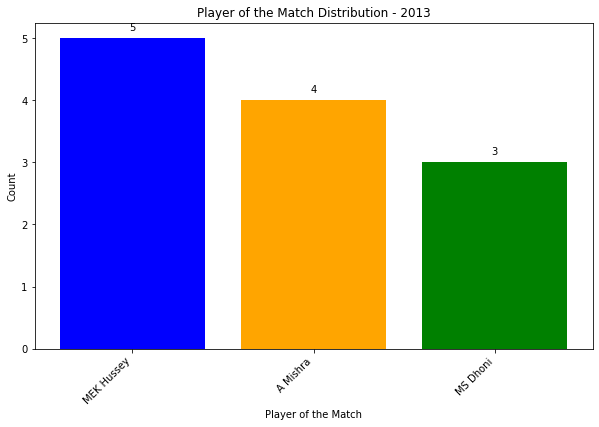

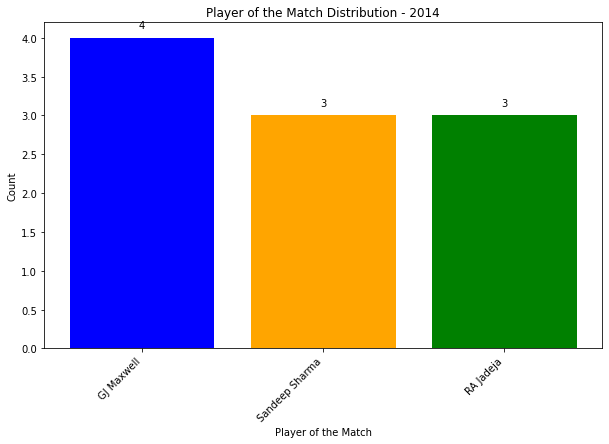

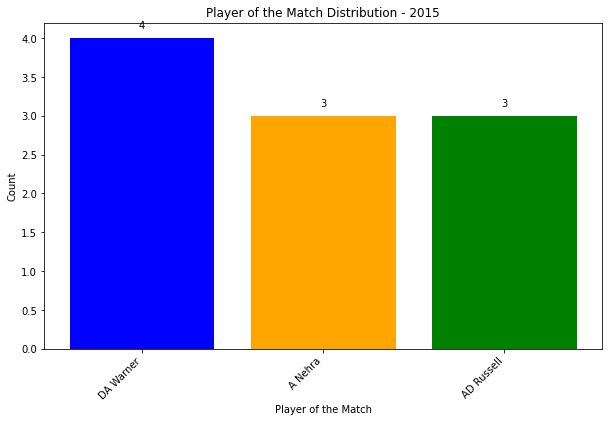

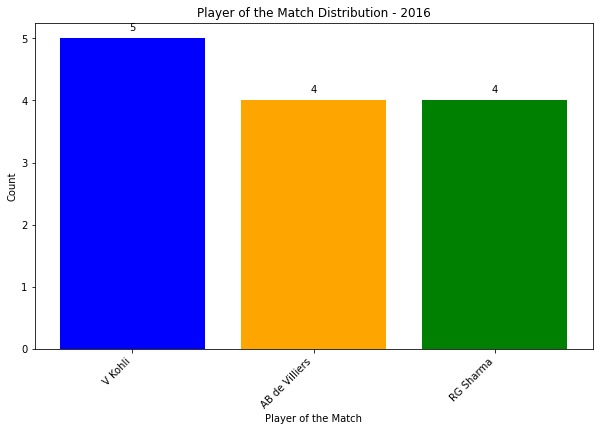

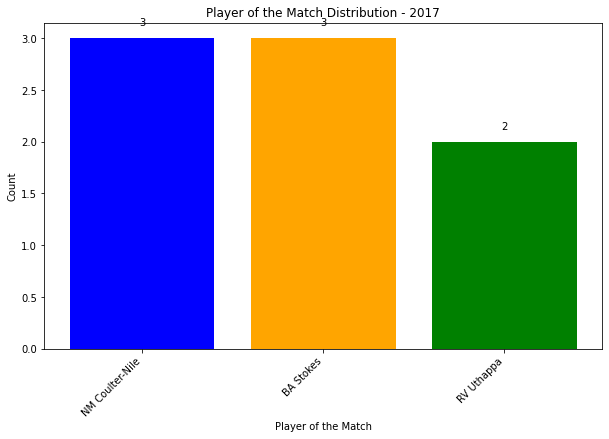

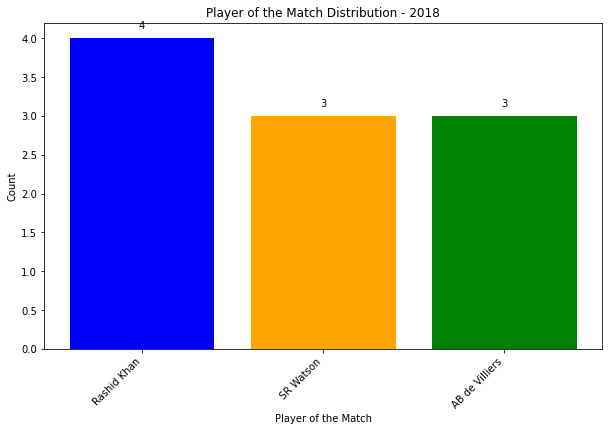

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# List of years from 2008 to 2018
years = list(range(2008, 2019))

# Iterate over each year
for year in years:
    # Filter the DataFrame for the current year
    year_df = df[df['season'] == year]

    # Group by player of the match and count the occurrences
    player_of_the_match = year_df['player_of_match'].value_counts().reset_index()
    player_of_the_match.columns = ['Player', 'Count']

    # Select only the top three players
    top_three_players = player_of_the_match.head(3)

    # Create a bar chart using Matplotlib
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_three_players['Player'], top_three_players['Count'], color=['blue', 'orange', 'green'])

    # Add count values on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
                 ha='center', va='bottom', color='black')

    # Customize the layout
    plt.title(f'Player of the Match Distribution - {year}')
    plt.xlabel('Player of the Match')
    plt.ylabel('Count')

    # Show the non-interactive plot for each year
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Top 10 Player of the match from season 2008 to 2019

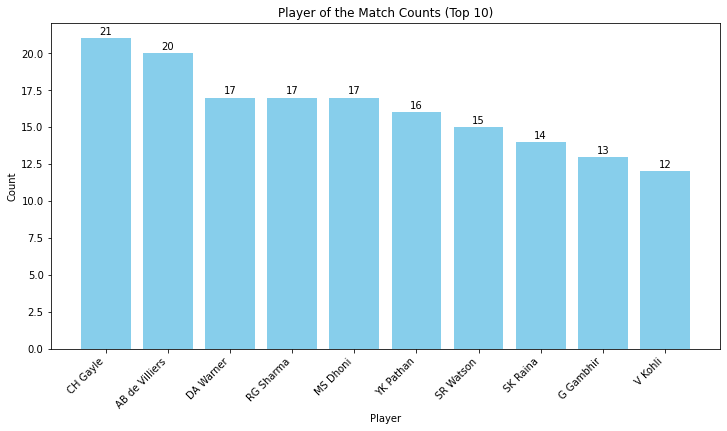

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Count the occurrences of each player in the "Player of the Match" column
player_of_match_counts = df['player_of_match'].value_counts().reset_index()
player_of_match_counts.columns = ['Player', 'Count']

# Filter for the top 10 players
top_players = player_of_match_counts[:10]

# Create a bar chart using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_players['Player'], top_players['Count'], color='skyblue')

# Add count values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', color='black')

# Customize the layout
plt.title('Player of the Match Counts (Top 10)')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the non-interactive plot
plt.show()


# To estimate how many matches played at which venue for each season from 2008 to 2019

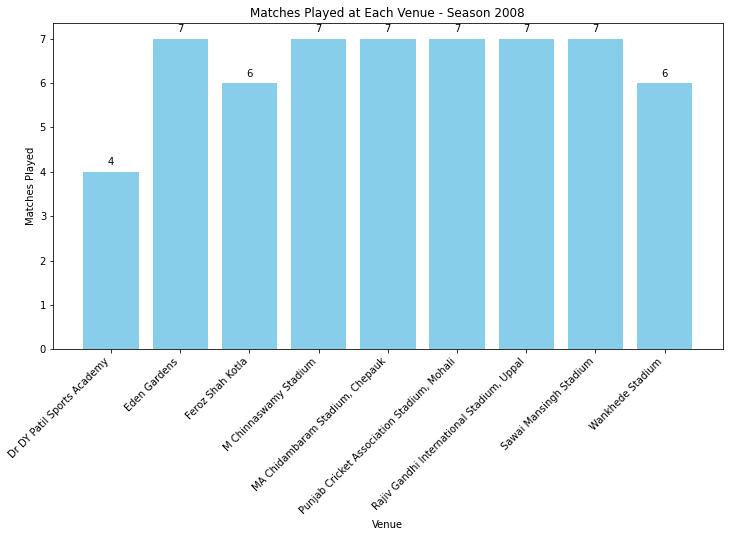

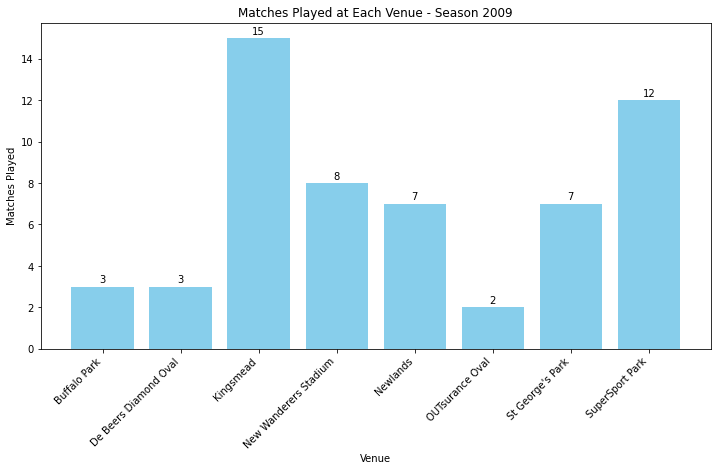

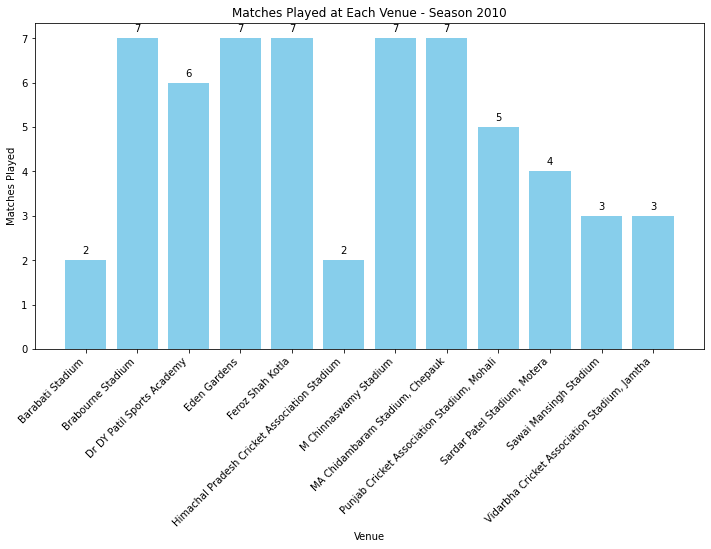

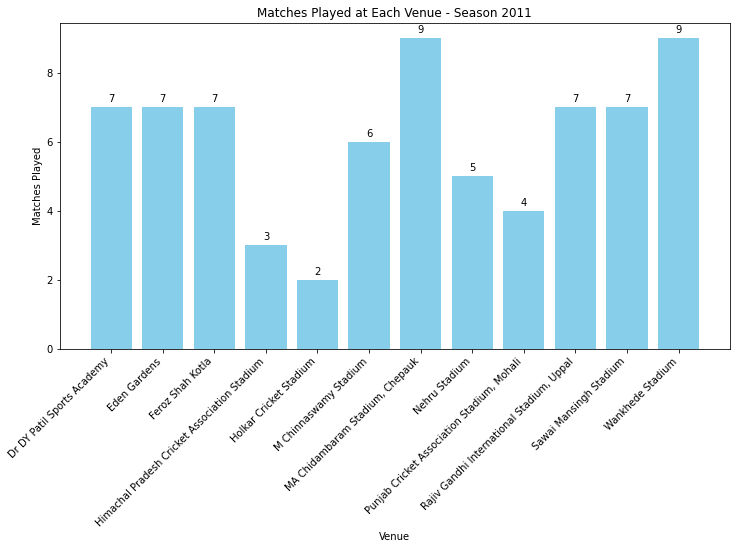

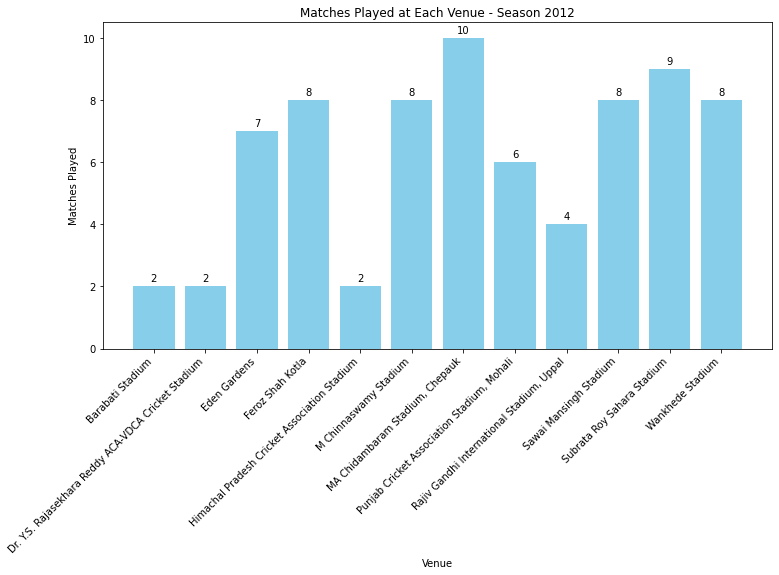

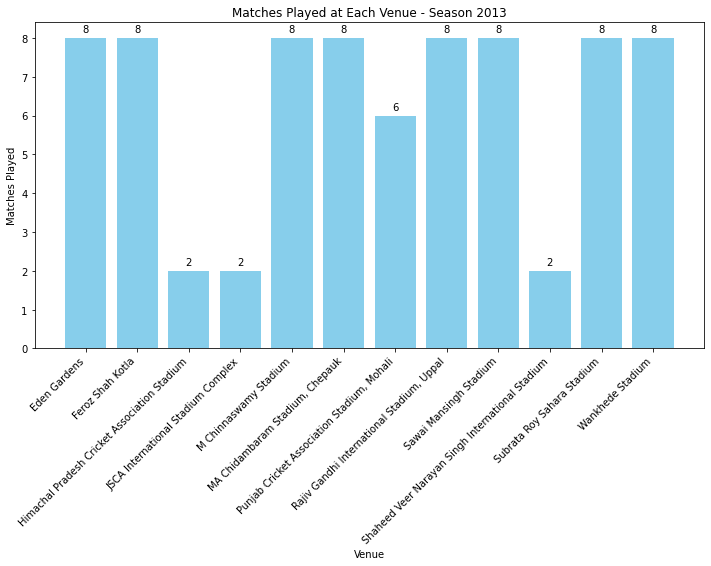

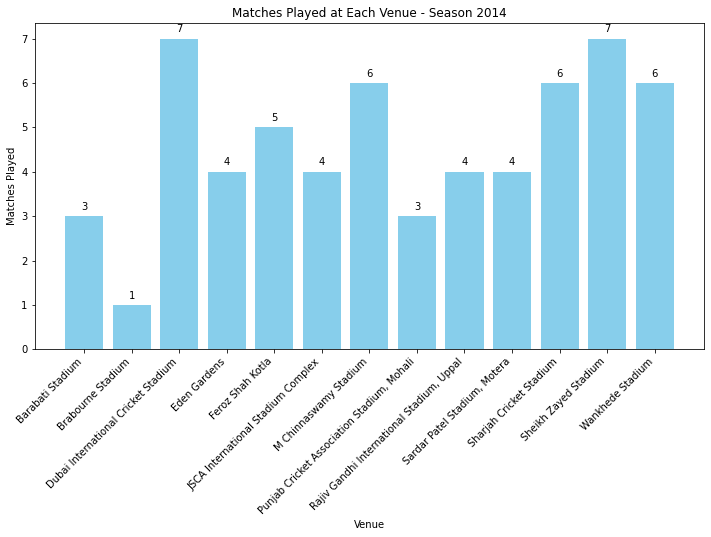

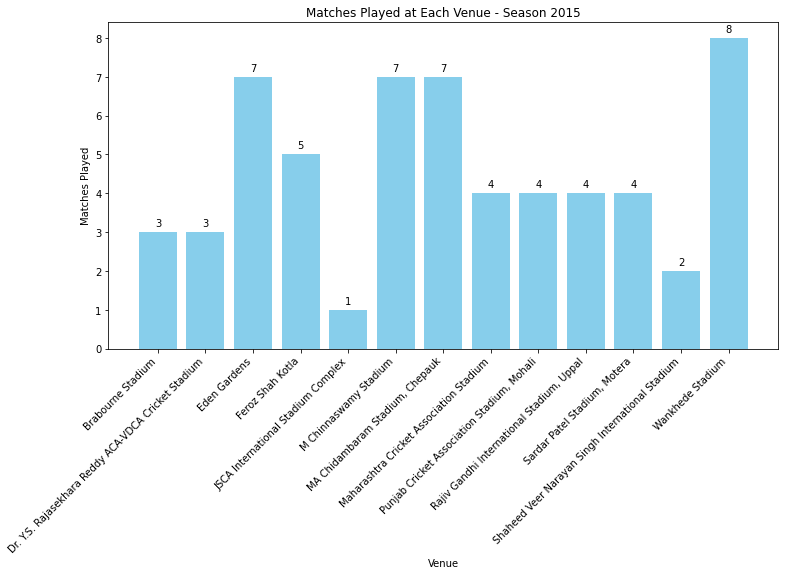

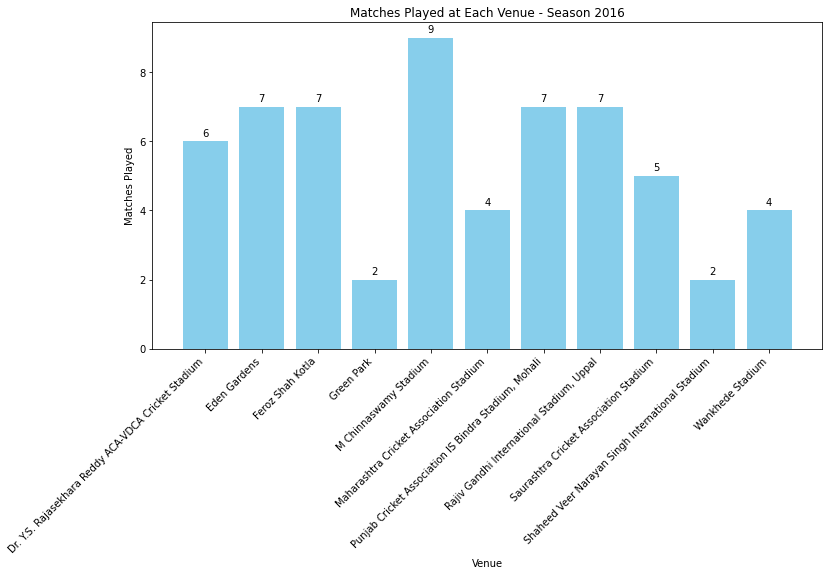

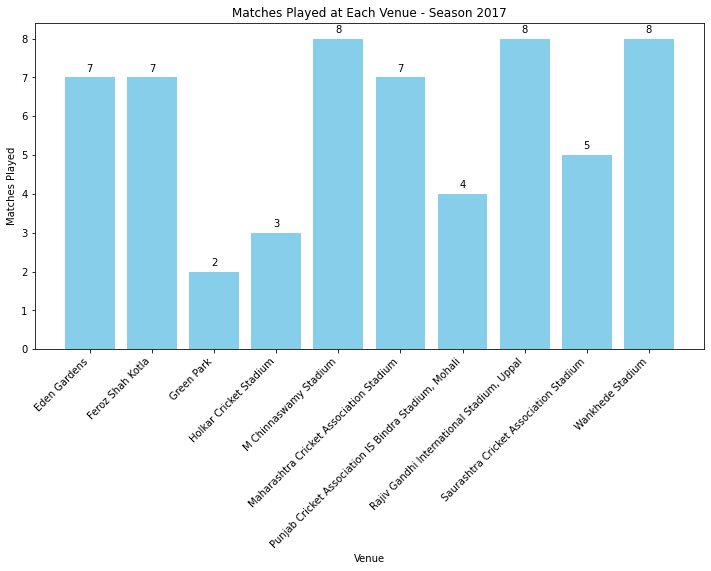

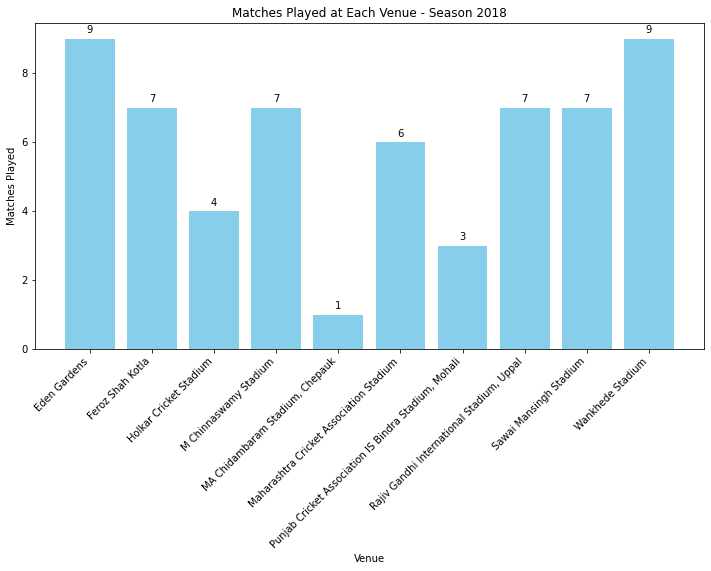

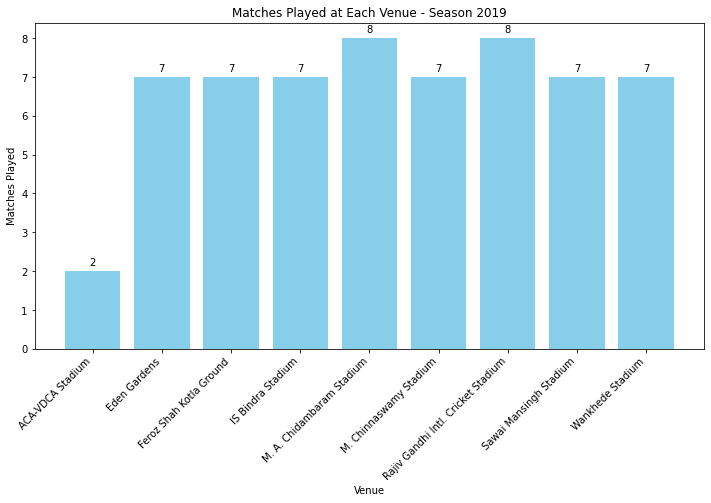

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Extract the year from the 'Season' column
df['Year'] = df['season'].astype(str).str[:4].astype(int)

# Create a DataFrame with match count for each venue in each season
venue_match_count = df.groupby(['Year', 'venue']).size().reset_index(name='Match Count')

# Iterate over each season and create a bar chart
for year in venue_match_count['Year'].unique():
    season_df = venue_match_count[venue_match_count['Year'] == year]

    # Create a bar chart using Matplotlib
    plt.figure(figsize=(12, 6))
    bars = plt.bar(season_df['venue'], season_df['Match Count'], color='skyblue')

    # Add count values on top of each bar
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
                 ha='center', va='bottom', color='black')

    # Customize the layout
    plt.title(f'Matches Played at Each Venue - Season {year}')
    plt.xlabel('Venue')
    plt.ylabel('Matches Played')
    plt.xticks(rotation=45, ha='right')

    # Show the non-interactive plot for each season
    plt.show()


# To estimate where most matchest played (Total Count) from 2008 to 2019

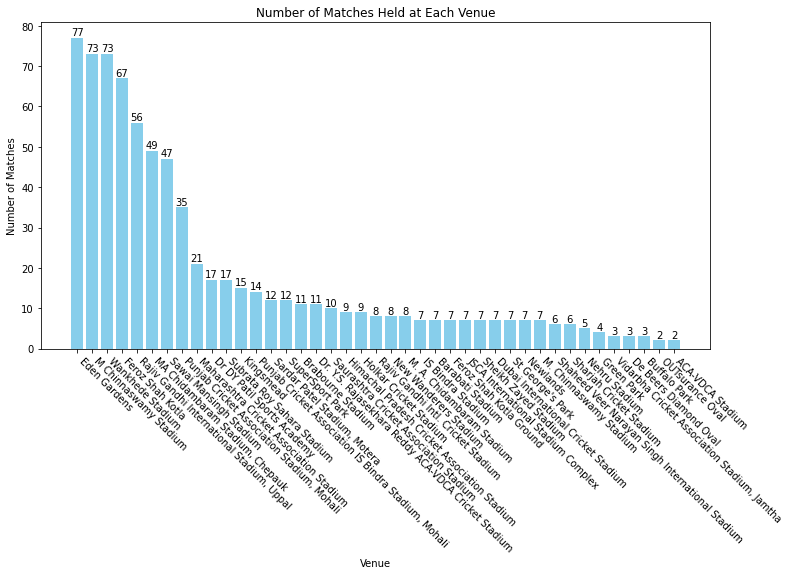

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Count the occurrences of each venue
venue_match_counts = df['venue'].value_counts().reset_index()
venue_match_counts.columns = ['Venue', 'Number of Matches']

# Create a bar graph using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(venue_match_counts['Venue'], venue_match_counts['Number of Matches'], color='skyblue')

# Add count values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(int(bar.get_height())),
             ha='center', va='bottom', color='black')

# Customize the layout
plt.title('Number of Matches Held at Each Venue')
plt.xlabel('Venue')
plt.ylabel('Number of Matches')
plt.xticks(rotation=-45, ha='left')  # Rotate x-axis labels for better readability

# Show the non-interactive plot
plt.show()


# Top 15 Most experienced umpires

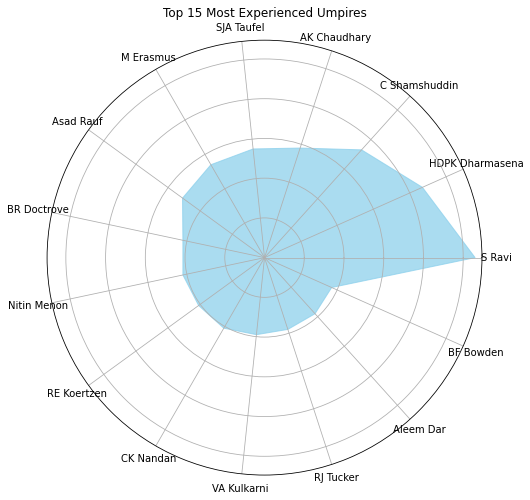

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Combine 'umpire1' and 'umpire2' columns, then count occurrences
umpire_counts = pd.concat([df['umpire1'], df['umpire2']]).value_counts().reset_index()
umpire_counts.columns = ['Umpire', 'Count']

# Select top 15 umpires
top_umpires = umpire_counts.head(15)

# Create a non-interactive spiderweb (radar) graph using Matplotlib
categories = top_umpires['Umpire']
values = top_umpires['Count']

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
values = np.concatenate((values, [values[0]]))  # Close the circle
theta = np.concatenate((theta, [theta[0]]))  # Close the circle
ax.fill(theta, values, color='skyblue', alpha=0.7)

ax.set_yticklabels([])  # Hide radial tick labels
ax.set_xticks(theta[:-1])  # Set ticks at category positions
ax.set_xticklabels(categories)
ax.set_title('Top 15 Most Experienced Umpires')

# Show the non-interactive plot
plt.show()


# Top 5 most experienced umpire per season for each season

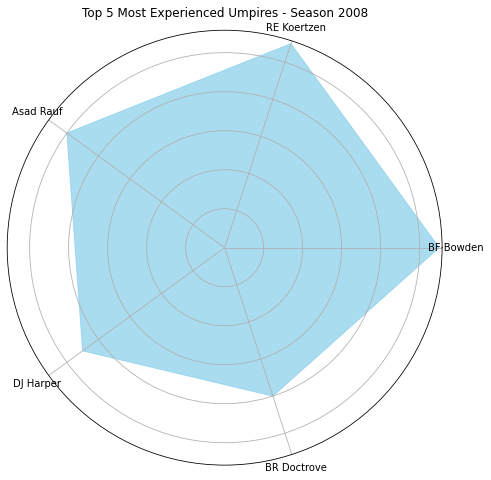

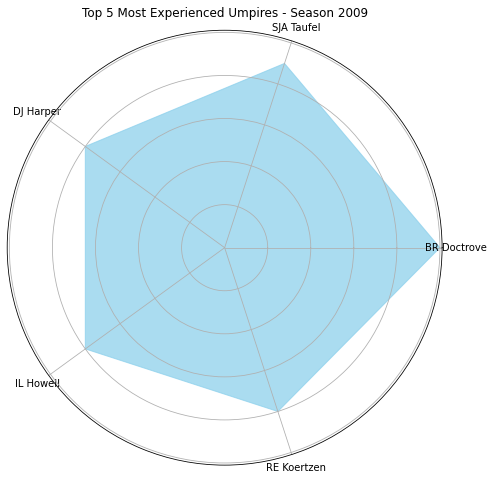

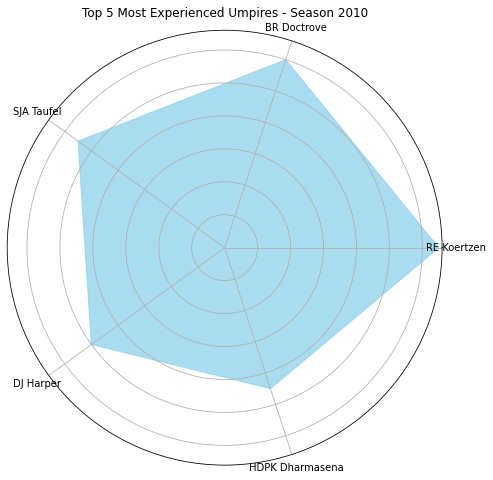

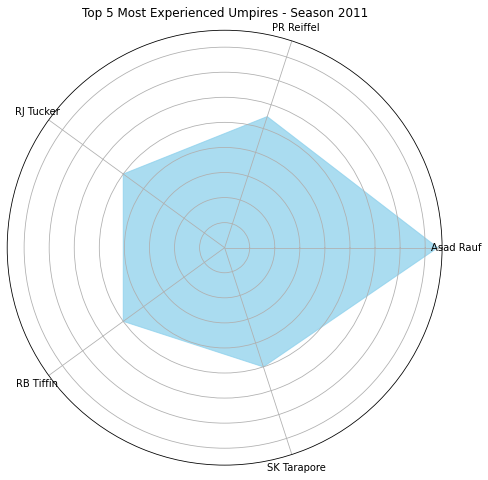

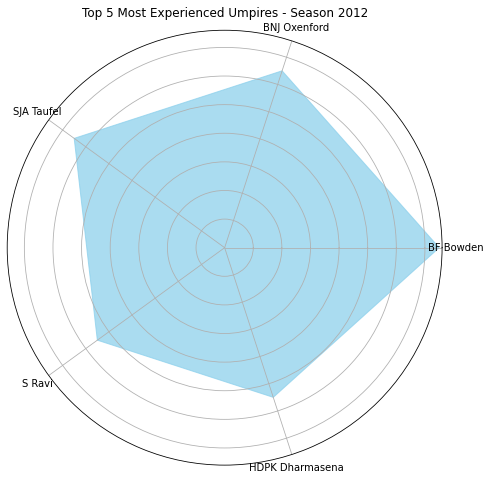

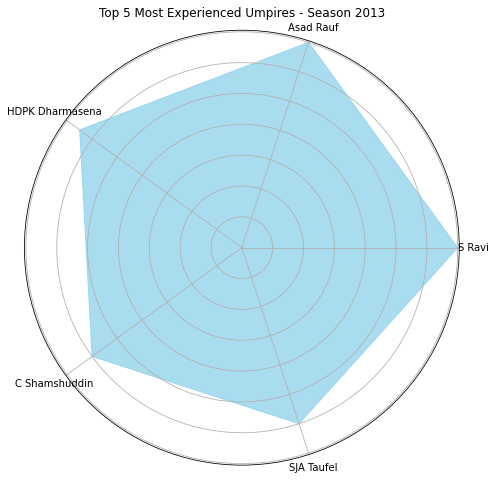

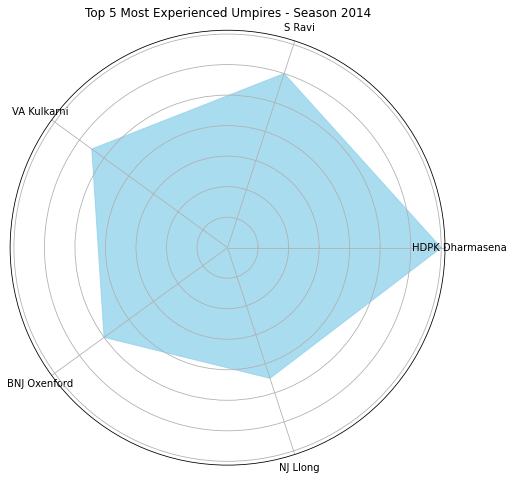

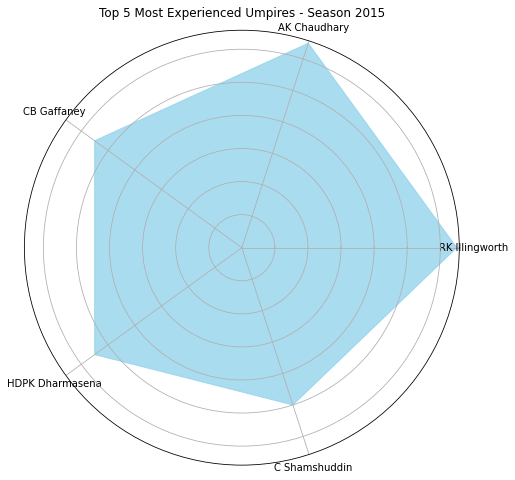

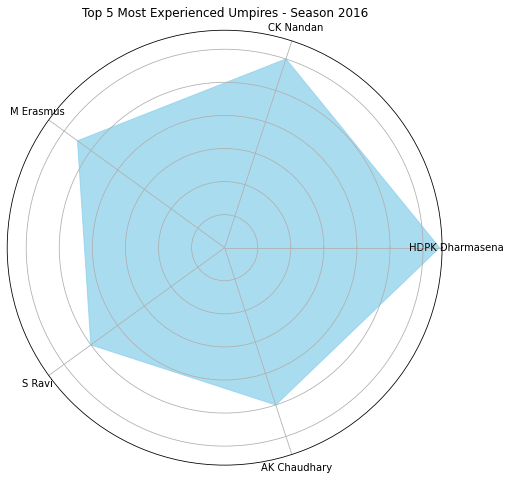

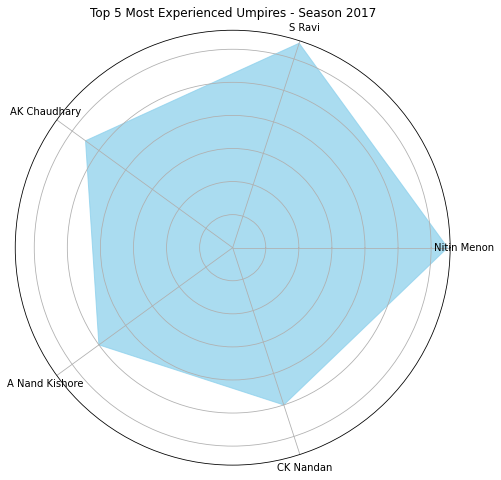

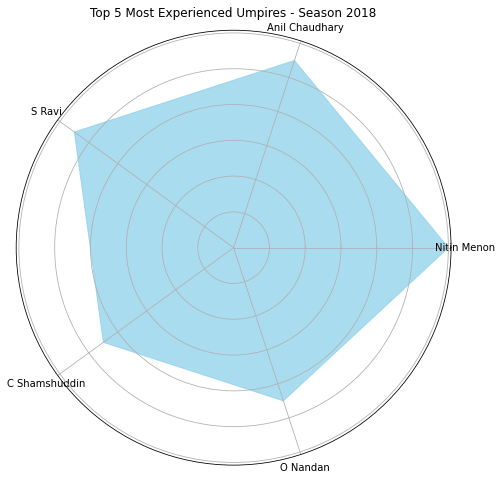

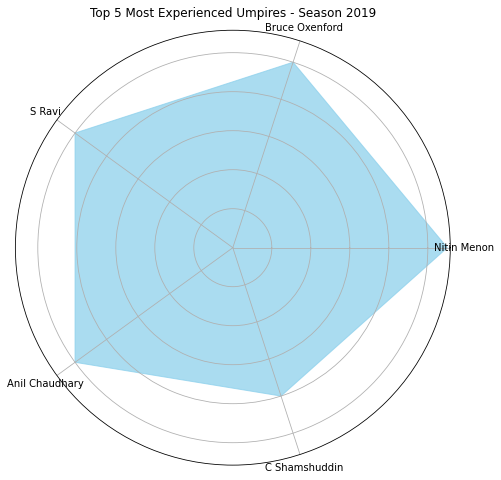

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Create an empty list to store spiderweb graphs for each season
spiderweb_graphs = []

# List of seasons from 2008 to 2019
seasons = list(range(2008, 2020))

for season in seasons:
    # Filter the DataFrame for the current season
    season_df = df[df['season'] == season]

    # Combine 'umpire1' and 'umpire2' columns, then count occurrences
    umpire_counts = pd.concat([season_df['umpire1'], season_df['umpire2']]).value_counts().reset_index()
    umpire_counts.columns = ['Umpire', 'Count']

    # Select top 5 umpires for the current season
    top_umpires = umpire_counts.head(5)

    # Create a non-interactive spiderweb (radar) graph using Matplotlib
    categories = top_umpires['Umpire']
    values = top_umpires['Count']

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)
    values = np.concatenate((values, [values[0]]))  # Close the circle
    theta = np.concatenate((theta, [theta[0]]))  # Close the circle
    ax.fill(theta, values, color='skyblue', alpha=0.7)

    ax.set_yticklabels([])  # Hide radial tick labels
    ax.set_xticks(theta[:-1])  # Set ticks at category positions
    ax.set_xticklabels(categories)
    ax.set_title(f'Top 5 Most Experienced Umpires - Season {season}')

    # Add the non-interactive spiderweb graph for the current season to the list
    spiderweb_graphs.append(fig)

# Show the non-interactive plots for each season
for graph in spiderweb_graphs:
    plt.show()


# To estimate highest matches played in which season

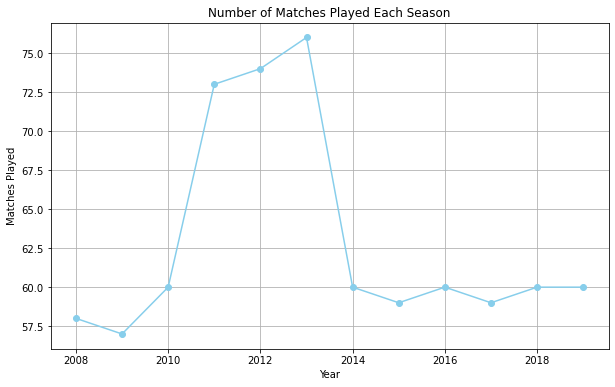

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Extract the year from the 'Season' column
df['Year'] = df['season'].astype(str).str[:4].astype(int)

# Group by year and count the number of matches played
matches_played_per_season = df.groupby('Year').size().reset_index(name='Matches Played')

# Plot a non-interactive line graph using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(matches_played_per_season['Year'], matches_played_per_season['Matches Played'], marker='o', color='skyblue')
plt.title('Number of Matches Played Each Season')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.grid(True)

# Show the non-interactive plot
plt.show()


# Top 10 Run scorer from 2008 to 2019

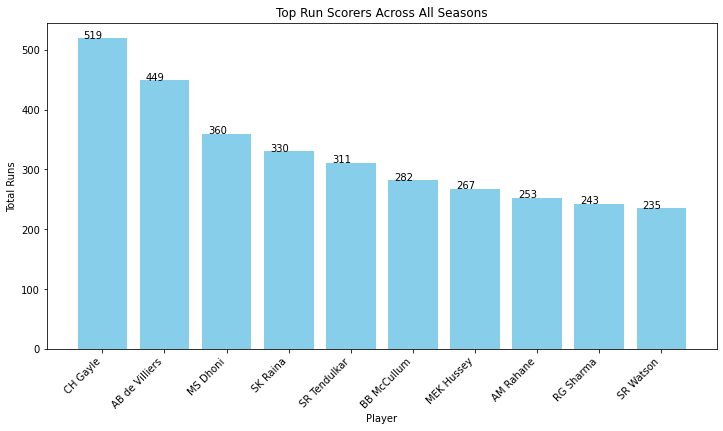

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Group by batsmen and calculate total runs
top_run_scorers = df.groupby('player_of_match')['win_by_runs'].sum().reset_index().sort_values(by='win_by_runs', ascending=False).head(10)

# Plot a non-interactive bar chart using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_run_scorers['player_of_match'], top_run_scorers['win_by_runs'], color='skyblue')

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', color='black')

# Customize the plot
plt.title('Top Run Scorers Across All Seasons')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the non-interactive plot
plt.show()


# Top 10 wicket taker from season 2008 to 2019

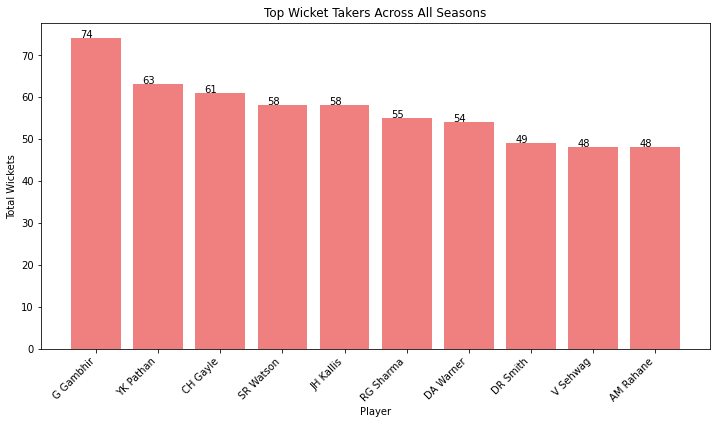

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\roari\Downloads\SDA Python.xlsx"
df = pd.read_excel(file_path)

# Group by bowlers and calculate total wickets
top_wicket_takers = df.groupby('player_of_match')['win_by_wickets'].sum().reset_index().sort_values(by='win_by_wickets', ascending=False).head(10)

# Plot a non-interactive bar chart using Matplotlib
plt.figure(figsize=(12, 6))
bars = plt.bar(top_wicket_takers['player_of_match'], top_wicket_takers['win_by_wickets'], color='lightcoral')

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', color='black')

# Customize the plot
plt.title('Top Wicket Takers Across All Seasons')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Show the non-interactive plot
plt.show()
